In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'ece143/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Mounted at /content/drive
/content/drive/My Drive/ece143


# import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('cleaned_data.csv', encoding='ISO-8859-1')
data.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,0,0,0,0,0,0,Not difficult at all,0,0,...,Male,25,Employed,BC,USA,Reddit,online real life friends,0,33,3.0
1,0,0,0,0,0,0,0,Not difficult at all,1,1,...,Male,18,CollegeStu,HS,USA,Reddit,online real life friends,0,31,23.0
2,0,0,0,1,0,1,0,Not difficult at all,5,3,...,Male,35,Employed,HS,Canada,Reddit,online strangers,2,13,33.0
3,0,0,0,0,0,0,1,Not difficult at all,2,5,...,Male,30,Employed,BC,Bosnia and Herzegovina,Reddit,All,1,19,8.0
4,3,3,3,2,0,1,3,Extremely difficult,6,6,...,Male,24,CollegeStu,HS,Germany,Other,online acquaintances,15,9,37.0


In [ ]:
df = data.copy()

In [ ]:
df = df[['Gender', 'Age', 'Work', 'Degree', 'Residence', 'Platform', 'earnings', 'whyplay', 'League', 'Reference', 'Playstyle',
                   'Game', 'Hours', 'Narcissism',
                   'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE',
                   'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5',
                   'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
                   'GAD_T', 'SWL_T', 'SPIN_T'
                  ]]

# SWL
* 5-9 points: Extremely dissastered
* 10-14 points: dissastered
* 15-19 points: Slightly dissastered
* 20 points: Neutral
* 21-25 points: Slightly satisfied
* 26-30 points: Satisfied
* 31-35 points: Extremely satisfied

<ipython-input-8-51c0c958c6ec>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = data.groupby(pd.cut(data['SWL_T'], bins=[4, 9, 14, 19, 20, 25, 30, 35], labels=["Extremely dissastered",


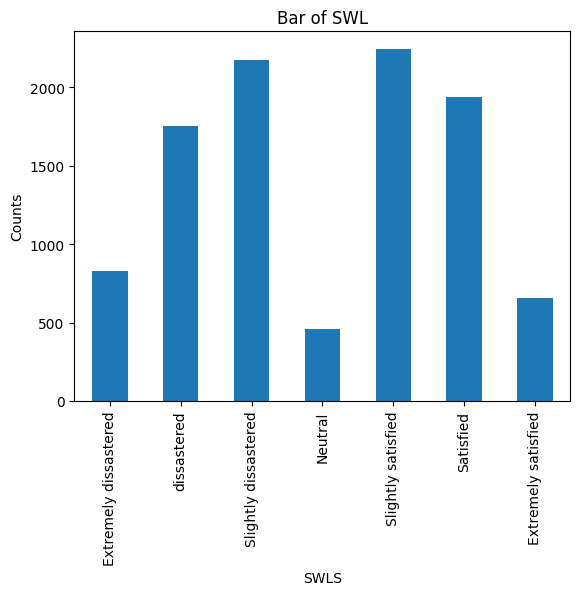

In [ ]:

group_counts = data.groupby(pd.cut(data['SWL_T'], bins=[4, 9, 14, 19, 20, 25, 30, 35], labels=["Extremely dissastered",
     "dissastered",
     "Slightly dissastered",
     "Neutral",
     "Slightly satisfied",
     "Satisfied",
     "Extremely satisfied"]))['SWL_T'].count()

group_counts.plot(kind='bar')

plt.xlabel("SWLS")
plt.ylabel("Counts")
plt.title("Bar of SWL")
plt.show()

In [ ]:
data['SWL_T'] = pd.cut(
     data['SWL_T'],
     bins=[4, 9, 14, 19, 20, 25, 30, 35],
     labels=["Extremely dissastered",
     "dissastered",
     "Slightly dissastered",
     "Neutral",
     "Slightly satisfied",
     "Satisfied",
     "Extremely satisfied"]
 ).astype(str)

# SWL DecisionTreeClassifier

In [ ]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Age,Work,Degree,Residence,Platform,earnings,whyplay,League,Reference,...,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,GAD_T,SWL_T,SPIN_T
0,1,25,1,0,97,2,1,2,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33,3.0
1,1,18,0,2,97,2,1,1,7,2,...,3.0,2.0,0.0,1.0,1.0,1.0,1.0,0,31,23.0
2,1,35,1,2,15,2,1,2,7,2,...,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2,13,33.0
3,1,30,1,0,11,2,1,1,7,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,19,8.0
4,1,24,0,2,32,2,1,1,2,1,...,3.0,3.0,1.0,1.0,3.0,1.0,1.0,15,9,37.0


In [ ]:
X_SWL = df.drop(columns=["GAD_T", "SWL_T", "SPIN_T"])
y_SWL = df['SWL_T']

X_train, X_test, y_train, y_test = train_test_split(X_SWL, y_SWL, random_state=42, test_size=0.2)

dtc = DecisionTreeClassifier(random_state=42, max_depth=10)
model = dtc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  6,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  5, 32,  6,  4,  3,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  8, 37, 14,  2,  2,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1, 18, 30, 18,  3,  4,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        25
           7       0.90      0.95      0.93        20
           8       0.77      0.80      0.79        41
           9       0.65      0.62      0.63        52
          10       0.57      0.56      0.56        66
          11       0.45      0.39      0.42        77
          12       0.45      0.59      0.51        68
          13       0.37      0.35      0.36        62
          14       0.41      0.39      0.40        79
          15       0.42      0.43      0.43        77
          16       0.29      0.27      0.28        79
          17       0.24      0.24      0.24        83
          18       0.29      0.28      0.29        85
          19       0.29      0.27      0.28        91
          20       0.36      0.40      0.38       100
          21       0.27      0.30      0.28        88
          22       0.31    

In [ ]:
from tabulate import tabulate

features = pd.DataFrame(dtc.feature_importances_, index=X_SWL.columns, columns=['Importance'])
top_10_features = features.nlargest(10, 'Importance')

table_str = tabulate(top_10_features, headers=["Top 10 Features", "Importance"], tablefmt="grid")

table_lines = table_str.split("\n")
print("\n".join(table_lines))


+-------------------+--------------+
| Top 10 Features   |   Importance |
+===================+==============+
| SWL5              |   0.184419   |
+-------------------+--------------+
| SWL4              |   0.170215   |
+-------------------+--------------+
| SWL3              |   0.162076   |
+-------------------+--------------+
| SWL2              |   0.161946   |
+-------------------+--------------+
| SWL1              |   0.129151   |
+-------------------+--------------+
| Residence         |   0.0145474  |
+-------------------+--------------+
| Age               |   0.0116871  |
+-------------------+--------------+
| League            |   0.0095467  |
+-------------------+--------------+
| SPIN11            |   0.00902305 |
+-------------------+--------------+
| Hours             |   0.00885949 |
+-------------------+--------------+


# SWL DecisionTreeRegressor

In [ ]:
X_SWL2 = df.iloc[:, :44]
y_SWL2 = df['SWL_T']

X_train, X_test, y_train, y_test = train_test_split(X_SWL2, y_SWL2, random_state=42, test_size=0.2)

dtr = DecisionTreeRegressor(random_state=42, max_depth=5)
model2 = dtr.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [ ]:
mean_absolute_error(y_pred2, y_test)

1.5601717102190793

In [ ]:
mean_squared_error(y_pred2, y_test)

3.9068915074665136

In [ ]:
r2_score(y_pred2, y_test)

0.9183426674254331